## FIRST ATTEMPT TO CNN

In this framework, I will try to built a first attempt to the neural networ requested by the project, so I try to answer to the first part of the project

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from keras.models import Sequential
from keras.layers import Dense
import os
import cv2


from keras.utils import to_categorical #to create dummy variable
from keras.layers import Conv2D,Flatten,Dropout, MaxPooling2D,AveragePooling2D

## PREPROCESSING DEI  DATI 

The most popular and de facto standard library in Python for loading and working with image data is Pillow. Pillow is an updated version of the Python Image Library, or PIL, and supports a range of simple and sophisticated image manipulation functionality.

In [17]:
import import_ipynb
import utils

In [18]:
# SOME IMPORTANT GLOBAL VARIABLE
base_dir = '../images/'
train_dir=os.path.join(base_dir,'train')
test_dir=os.path.join(base_dir,'test')
direc = '../images/train/'
labels = ["Bedroom","Coast","Forest","HighWay","Industrial","InsideCity","Kitchen","LivingRoom","Mountain","Office","OpenCountry","Store","Street","Suburb","TallBuilding"]
list_categories = ['../images/train/{}'.format(i) for i in os.listdir(train_dir) if i!='.DS_Store']




In [70]:
list_of_images = utils.list_of_path(labels,'../images/train/')
train_data,train_labels= utils.read_and_process_images(list_of_images)



In [23]:
train_data = train_data.reshape(train_data.shape[0],train_data.shape[1],train_data.shape[2],1)
test_data = test_data.reshape(test_data.shape[0],test_data.shape[1],test_data.shape[2],1)

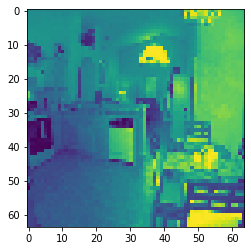

In [24]:
plt.imshow(train_data[330,:,:,0])

In [25]:
from keras.utils import to_categorical
from keras import optimizers

In [26]:
train_labels_dummy = to_categorical(train_labels,15)
test_labels_dummy = to_categorical(test_labels,15)

## DEFINITION OF THE MODEL 

In [39]:
sgd = optimizers.SGD(momentum=0.9,nesterov=True)

In [40]:
from keras import initializers

In [41]:
norm = initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)

In [54]:

#adam = optimizers.Adam()
model = Sequential()
#first convolutional layer
model.add(Conv2D(filters=8,kernel_size=3,padding = 'valid',activation='relu',input_shape=(64,64,1)))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Dropout(0.3))
#secondo convolutional layer
model.add(Conv2D(filters=16,kernel_size=3,strides=2,padding='valid',activation='relu',input_shape=(64,64,1)))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Dropout(0.3))
#third convolutional layer
model.add(Conv2D(filters=32,kernel_size=3,padding='valid',activation='relu',input_shape=(64,64,1)))
model.add(Flatten())
model.add(Dense(15,activation='relu',kernel_initializer=norm,bias_initializer='zeros'))
model.add(Dense(15,activation='softmax'))

#classification output
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics = ['accuracy'])




In [55]:
from keras.callbacks import EarlyStopping
from keras.callbacks import History
history = History()
earlyStopping = EarlyStopping(min_delta=0.001,patience = 10)


model.fit(train_data,train_labels_dummy,batch_size=32,epochs=100,validation_split=0.15,shuffle=True,callbacks=[history])


Train on 1275 samples, validate on 225 samples
Epoch 1/100
1275/1275 [==============================] - 1s 1ms/step - loss: 2.7096 - accuracy: 0.0627 - val_loss: 2.7104 - val_accuracy: 0.0489
Epoch 2/100
1275/1275 [==============================] - 1s 875us/step - loss: 2.7081 - accuracy: 0.0706 - val_loss: 2.7115 - val_accuracy: 0.0444
Epoch 3/100
1275/1275 [==============================] - 1s 837us/step - loss: 2.7059 - accuracy: 0.0635 - val_loss: 2.7103 - val_accuracy: 0.0444
Epoch 4/100
1275/1275 [==============================] - 1s 850us/step - loss: 2.6991 - accuracy: 0.1035 - val_loss: 2.7031 - val_accuracy: 0.1333
Epoch 5/100
1275/1275 [==============================] - 1s 855us/step - loss: 2.6839 - accuracy: 0.1294 - val_loss: 2.6814 - val_accuracy: 0.1600
Epoch 6/100
1275/1275 [==============================] - 1s 874us/step - loss: 2.6506 - accuracy: 0.1349 - val_loss: 2.6323 - val_accuracy: 0.1600
Epoch 7/100
1275/1275 [==============================] - 1s 851us/step - 

1275/1275 [==============================] - 1s 808us/step - loss: 0.8182 - accuracy: 0.7184 - val_loss: 3.2496 - val_accuracy: 0.2489
Epoch 57/100
1275/1275 [==============================] - 1s 793us/step - loss: 0.8478 - accuracy: 0.7098 - val_loss: 2.7112 - val_accuracy: 0.2844
Epoch 58/100
1275/1275 [==============================] - 1s 799us/step - loss: 0.8668 - accuracy: 0.7098 - val_loss: 2.2526 - val_accuracy: 0.3644
Epoch 59/100
1275/1275 [==============================] - 1s 801us/step - loss: 0.7612 - accuracy: 0.7506 - val_loss: 2.3910 - val_accuracy: 0.3644
Epoch 60/100
1275/1275 [==============================] - 1s 809us/step - loss: 0.7913 - accuracy: 0.7239 - val_loss: 2.4089 - val_accuracy: 0.3244
Epoch 61/100
1275/1275 [==============================] - 1s 784us/step - loss: 0.7457 - accuracy: 0.7427 - val_loss: 2.5002 - val_accuracy: 0.3289
Epoch 62/100
1275/1275 [==============================] - 1s 791us/step - loss: 0.7067 - accuracy: 0.7522 - val_loss: 2.5056 

In [56]:
model.evaluate(test_data,test_labels_dummy)

2985/2985 [==============================] - 1s 281us/step


[2.665924292153849, 0.39262980222702026]

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
y_pred = model.predict_classes(test_data)

In [59]:
cm = confusion_matrix(test_labels,y_pred)

In [60]:
import itertools

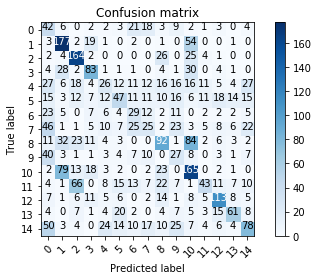

In [61]:
utils.plot_confusion_matrix(cm,['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14'])


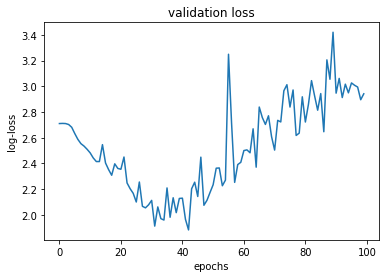

In [62]:
plt.title("validation loss")
plt.xlabel("epochs")
plt.ylabel("log-loss")
plt.plot(history.history['val_loss'])


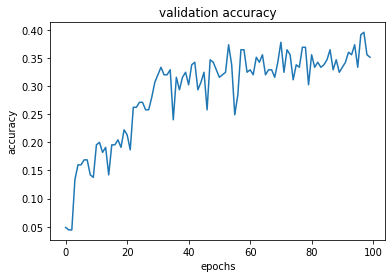

In [63]:

plt.title("validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(history.history['val_accuracy'])


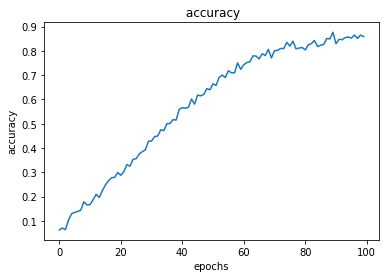

In [64]:
plt.title(" accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(history.history['accuracy'])

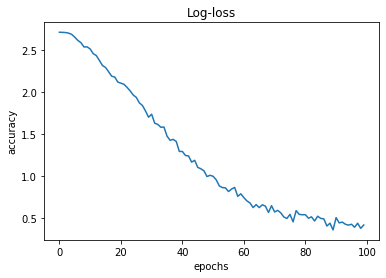

In [65]:
plt.title("Log-loss")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(history.history['loss'])

## FASE 2 --> CERCARE DI MIGLIORARE LA NOSTRA RETE NEURALE 

Il test accuracy ora è di circa il 35%, ma lo vogliamo migliorare in qualche modo

Già con il Dropout la situazione migliora, anche se non di molto

Ora proveremo con il data augmentation, considerando semplicemente le stesse immagini ""specchiate"

In [108]:
#CREAZIONE DEI DATI PER LA NOSTRA NUOVA RETE NEURALE
train_data_aug, train_labels_aug = utils.read_and_process_images(list_of_images)
train_data_aug,train_labels_aug = utils.data_augmentation(train_data_aug,train_labels_aug)
train_data_aug = train_data_aug.reshape(train_data_aug.shape[0],train_data_aug.shape[1],train_data_aug.shape[2],1)


In [73]:
train_labels_dummy_aug = to_categorical(train_labels_aug,15)

## DEFINITION OF THE SECOND MODEL, WITH DATA AUGMENTATION 


In [88]:
from keras.layers.normalization import BatchNormalization

In [101]:
#adam = optimizers.Adam()
model_aug = Sequential()
#first convolutional layer
model_aug.add(Conv2D(filters=8,kernel_size=3,padding = 'valid',activation='relu',input_shape=(64,64,1)))
model_aug.add(BatchNormalization(axis=1))
model_aug.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Dropout(0.3))
#secondo convolutional layer
model_aug.add(Conv2D(filters=16,kernel_size=3,strides=2,padding='valid',activation='relu',input_shape=(64,64,1)))
model_aug.add(BatchNormalization(axis=1))
model_aug.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Dropout(0.3))
#third convolutional layer
model_aug.add(Conv2D(filters=32,kernel_size=3,padding='valid',activation='relu',input_shape=(64,64,1)))
model_aug.add(BatchNormalization(axis=1))
model_aug.add(Flatten())
model_aug.add(Dense(15,activation='relu',kernel_initializer=norm,bias_initializer='zeros'))
model_aug.add(BatchNormalization(axis=1))
model_aug.add(Dense(15,activation='softmax'))

#classification output
model_aug.compile(loss='categorical_crossentropy',optimizer=sgd,metrics = ['accuracy'])

In [102]:
from keras.callbacks import EarlyStopping
from keras.callbacks import History
history = History()
earlyStopping = EarlyStopping(min_delta=0.0000001,patience = 20)


model_aug.fit(train_data_aug,train_labels_dummy_aug,batch_size=32,epochs=50,validation_split=0.15,shuffle=True,callbacks=[history])

Train on 2550 samples, validate on 450 samples
Epoch 1/50
2550/2550 [==============================] - 5s 2ms/step - loss: 2.4317 - accuracy: 0.2251 - val_loss: 3.8790 - val_accuracy: 0.0444
Epoch 2/50
2550/2550 [==============================] - 4s 1ms/step - loss: 2.0259 - accuracy: 0.3353 - val_loss: 10.9921 - val_accuracy: 0.0556
Epoch 3/50
2550/2550 [==============================] - 4s 1ms/step - loss: 1.8113 - accuracy: 0.3906 - val_loss: 8.2392 - val_accuracy: 0.0644
Epoch 4/50
2550/2550 [==============================] - 4s 2ms/step - loss: 1.6433 - accuracy: 0.4310 - val_loss: 2.4232 - val_accuracy: 0.2156
Epoch 5/50
2550/2550 [==============================] - 4s 1ms/step - loss: 1.5093 - accuracy: 0.4749 - val_loss: 2.3965 - val_accuracy: 0.2622
Epoch 6/50
2550/2550 [==============================] - 4s 1ms/step - loss: 1.4069 - accuracy: 0.5196 - val_loss: 4.6372 - val_accuracy: 0.1600
Epoch 7/50
2550/2550 [==============================] - 4s 2ms/step - loss: 1.4408 - acc

In [103]:
model_aug.evaluate(test_data,test_labels_dummy)

2985/2985 [==============================] - 1s 448us/step


[3.426022266343211, 0.4837521016597748]

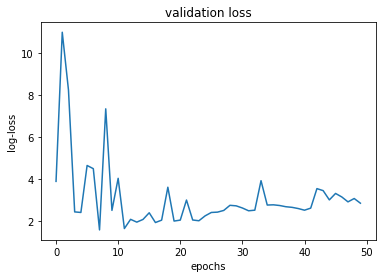

In [104]:
plt.title("validation loss")
plt.xlabel("epochs")
plt.ylabel("log-loss")
plt.plot(history.history['val_loss'])

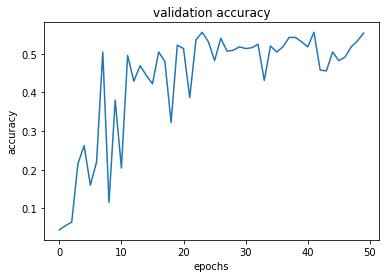

In [105]:
plt.title("validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(history.history['val_accuracy'])

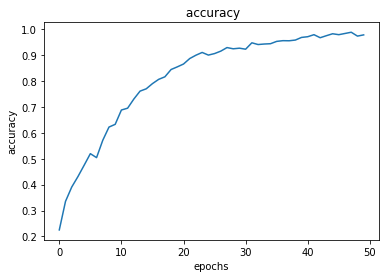

In [106]:
plt.title(" accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(history.history['accuracy'])

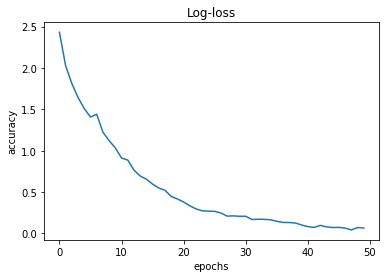

In [107]:
plt.title("Log-loss")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(history.history['loss'])